In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/gender_submission.csv
input/test.csv
input/train.csv


In [122]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
train_data["Sex"].replace("male", 1, inplace = True)
train_data["Sex"].replace("female", 0, inplace = True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [126]:
test_data["Sex"].replace("male", 1, inplace = True)
test_data["Sex"].replace("female", 0, inplace = True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [128]:
Semb = train_data.loc[train_data.Embarked == 'S']["Survived"]
rate_Semb = sum(Semb)/len(Semb)
Cemb = train_data.loc[train_data.Embarked == 'C']["Survived"]
rate_Cemb = sum(Cemb)/len(Cemb)
Qemb = train_data.loc[train_data.Embarked == 'Q']["Survived"]
rate_Qemb = sum(Qemb)/len(Qemb)
nullemb = train_data.loc[train_data.Embarked.isnull()]["Survived"]
rate_nullemb = sum(nullemb)/len(nullemb)

print("% of S who survived:", rate_Semb)
print("% of C who survived:", rate_Cemb)
print("% of Q who survived:", rate_Qemb)


% of S who survived: 0.33695652173913043
% of C who survived: 0.5535714285714286
% of Q who survived: 0.38961038961038963


In [129]:
train_data.dropna(subset=['Embarked'],inplace=True)
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [130]:
train_data["Embarked"].replace("S", 1, inplace = True)
train_data["Embarked"].replace("Q", 2, inplace = True)
train_data["Embarked"].replace("C", 3, inplace = True)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [131]:
test_data["Embarked"].replace("S", 1, inplace = True)
test_data["Embarked"].replace("Q", 2, inplace = True)
test_data["Embarked"].replace("C", 3, inplace = True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1


In [132]:
train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)

In [133]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [134]:
newdf = train_data.select_dtypes(include='number')
newdf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,3
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005028 -0.035330  0.043136  0.030335 -0.057686   
Survived       -0.005028  1.000000 -0.335549 -0.541585 -0.074513 -0.034040   
Pclass         -0.035330 -0.335549  1.000000  0.127741 -0.328256  0.081656   
Sex             0.043136 -0.541585  0.127741  1.000000  0.089339 -0.116348   
Age             0.030335 -0.074513 -0.328256  0.089339  1.000000 -0.231908   
SibSp          -0.057686 -0.034040  0.081656 -0.116348 -0.231908  1.000000   
Parch          -0.001657  0.083151  0.016824 -0.247508 -0.178013  0.414542   
Fare            0.012703  0.255290 -0.548193 -0.179958  0.088780  0.160887   
Embarked       -0.013166  0.169718 -0.164681 -0.110320  0.028659 -0.068900   

                Parch      Fare  Embarked  
PassengerId -0.001657  0.012703 -0.013166  
Survived     0.083151  0.255290  0.169718  
Pclass       0.016824 -0.548193 -0.164681  
Sex         -0.247508 -0.179958 -0.110320  

<Axes: >

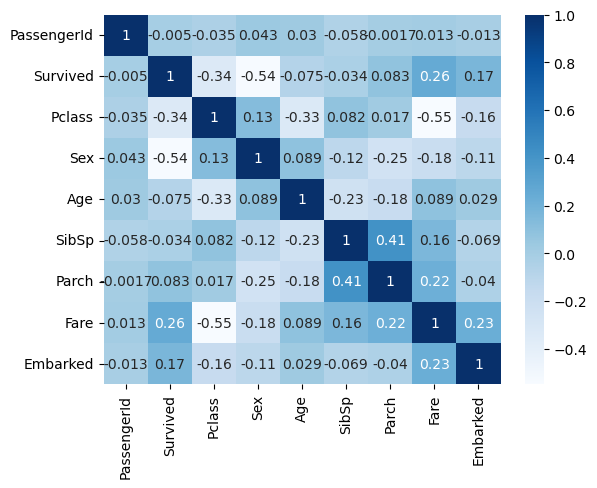

In [135]:
import seaborn as sb

corr = newdf.corr()
print(corr)
sb.heatmap(corr, cmap="Blues", annot=True)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

features = ["Pclass", "Fare", "Age", "Parch", "Sex", "Embarked"]
X = pd.get_dummies(newdf[features])
y = newdf["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8426966292134831


In [141]:
test_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,1.598086
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.854496
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [142]:
test_data['Age'].fillna(value=test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(value=test_data['Fare'].mean(), inplace=True)
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [143]:

predictions = model.predict(pd.get_dummies(test_data[features]))
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
